In [2]:
import csv

data = []
var_num = str(51)
fname = 'УИР1_ВАРИАНТЫ-23-51-104.csv'

with open(fname) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(float(row[var_num]))
    

In [3]:
# математическое ожидание
def expected_value(data):
    s = 0
    for e in data:
        s += e
    return s / len(data)
    
# дисперсия
def variance(data):
    s = 0
    m = expected_value(data)
    n = len(data)
    for e in data:
        s += (e ** 2)
    return s / n - m ** 2
    
# same as above but computed different
def variance2(data):
    s = 0
    m = expected_value(data)
    n = len(data)
    for e in data:
        s += (e - m) ** 2
    return s / n

# несмещенная дисперсия
def unbiased_variance(data):
    var = variance(data)
    n = len(data)
    return var * (n / (n - 1))
    
# среднеквадратическое отклонение
def sko_of_x(data):
    return unbiased_variance(data) ** 0.5
    
def sko_of_m(data):
    return (unbiased_variance(data) / len(data)) ** 0.5
    
def deviation_e(data, p):
    ts = {
        0.9 : 1.643,
        0.95: 1.960,
        0.99: 2.576
    }

    if p not in ts.keys():
        raise "unknown value"

    return sko_of_m(data) * ts[p]

# доверительный интервал
def confidence_interval(data, p):
    m = expected_value(data)
    e = deviation_e(data, p)
    return (m, e)

# вариация
def variation(data):
    m = expected_value(data)
    sko = sko_of_x(data)
    return sko / m
    
def relative_deviation_percent(val, exp):
    return 100 * (val - exp) / exp

In [4]:
def analyze(data, bounds, idx300, conf_int_vals):
    expected_values = []
    unbiased_variances = []
    confidence_intervals = []
    sko_of_xs = []
    variations = []

    for bound in bounds:
        cur_data = data[0:bound]
        expected_values.append(expected_value(cur_data))
        unbiased_variances.append(variance(cur_data))
        sko_of_xs.append(sko_of_x(cur_data))
        variations.append(variation(cur_data))

        bound_conf_ints = []
        for p in conf_int_vals:
            bound_conf_ints.append(confidence_interval(cur_data, p))
        confidence_intervals.append(bound_conf_ints)
        
        
    for i in range(len(bounds)):
        bi = bounds[i]
        exp_vali = expected_values[i]
        exp_val300 = expected_values[idx300]
        rel_exp_val = relative_deviation_percent(exp_vali, exp_val300)
        print(f"for bounds {bounds[i]}:")
        print(f"\texp_val={round(exp_vali, 3)}, rel={round(rel_exp_val, 3)}%")

        for j in range(len(conf_int_vals)):
            conf_int_m = confidence_intervals[i][j][0]
            conf_int_e = confidence_intervals[i][j][1]
            rel_conf_int_m = relative_deviation_percent(conf_int_m, confidence_intervals[idx300][j][0])
            rel_conf_int_e = relative_deviation_percent(conf_int_e, confidence_intervals[idx300][j][1])
            print(f"\tconf_int {conf_int_vals[j]}: {round(conf_int_m, 3)} +- {round(conf_int_e, 3)}")
            print(f"\tconf_int {conf_int_vals[j]} rel: {round(rel_conf_int_m, 3)}% +- {round(rel_conf_int_e, 3)}%")

        vari = unbiased_variances[i]
        rel_vari = relative_deviation_percent(vari, unbiased_variances[idx300])
        print(f"\tvariance: {round(vari, 3)}, rel={round(rel_vari, 3)}%")
        
        skoi = sko_of_xs[i]
        rel_skoi = relative_deviation_percent(skoi, sko_of_xs[idx300])
        print(f"\tsko: {round(skoi, 3)}, rel={round(rel_skoi, 3)}%")
        
        variation_i = variations[i]
        rel_variation_i = relative_deviation_percent(variation_i, variations[idx300])
        print(f"\tvariation: {round(variation_i, 3)}, rel={round(rel_variation_i, 3)}%")
        
    return (expected_values, unbiased_variances, confidence_intervals, sko_of_xs, variations)
        

bounds = [10, 20, 50, 100, 200, 300]
idx300 = bounds.index(300)
conf_int_vals = [0.9, 0.95, 0.99]

(expected_values, unbiased_variances, confidence_intervals, sko_of_xs, variations) = analyze(data, bounds, idx300, conf_int_vals)



for bounds 10:
	exp_val=21.232, rel=-6.496%
	conf_int 0.9: 21.232 +- 20.217
	conf_int 0.9 rel: -6.496% +- 446.917%
	conf_int 0.95: 21.232 +- 24.117
	conf_int 0.95 rel: -6.496% +- 446.917%
	conf_int 0.99: 21.232 +- 31.697
	conf_int 0.99 rel: -6.496% +- 446.917%
	variance: 1362.667, rel=-9.964%
	sko: 38.911, rel=-0.147%
	variation: 1.833, rel=6.79%
for bounds 20:
	exp_val=24.745, rel=8.971%
	conf_int 0.9: 24.745 +- 13.293
	conf_int 0.9 rel: 8.971% +- 259.613%
	conf_int 0.95: 24.745 +- 15.858
	conf_int 0.95 rel: 8.971% +- 259.613%
	conf_int 0.99: 24.745 +- 20.842
	conf_int 0.99 rel: 8.971% +- 259.613%
	variance: 1243.737, rel=-17.823%
	sko: 36.183, rel=-7.148%
	variation: 1.462, rel=-14.793%
for bounds 50:
	exp_val=25.591, rel=12.7%
	conf_int 0.9: 25.591 +- 9.36
	conf_int 0.9 rel: 12.7% +- 153.204%
	conf_int 0.95: 25.591 +- 11.166
	conf_int 0.95 rel: 12.7% +- 153.204%
	conf_int 0.99: 25.591 +- 14.675
	conf_int 0.99 rel: 12.7% +- 153.204%
	variance: 1590.16, rel=5.067%
	sko: 40.282, rel=3.

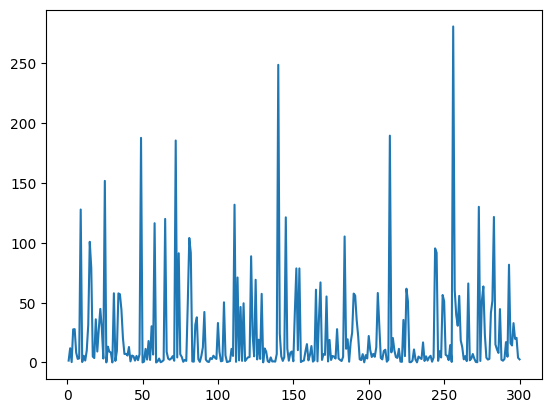

In [5]:
import matplotlib.pyplot as plt

def plt_show_values(data):
    fig, ax = plt.subplots()

    data_x = range(1, len(data) + 1)
    ax.plot(data_x, data)
    plt.show()
    
plt_show_values(data)

In [6]:
# ковариация
def covariance(data_a, data_b):
    if len(data_a) != len(data_b):
        raise "len is not same"
    n = len(data_a)
    s = 0
    a_m = expected_value(data_a)
    b_m = expected_value(data_b)
    for i in range(n):
        s += (data_a[i] - a_m) * (data_b[i] - b_m)
    return s / n

# коэффициент автокорелляции
def correlation(data_a, data_b):
    cov = covariance(data_a, data_b)
    sko_a = sko_of_x(data_a)
    sko_b = sko_of_x(data_b)
    return cov / (sko_a * sko_b)


1,	-0.012
2,	-0.011
3,	-0.108
4,	-0.065
5,	-0.049
6,	-0.014
7,	0.073
8,	-0.082
9,	0.068
10,	0.017


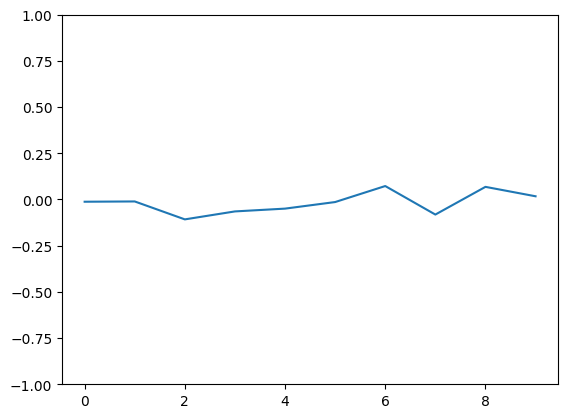

In [7]:
movs = range(1, 11)
correlation_coefs = []

for mov in movs:
    data_m = data[mov:] + data[0:mov]
    correlation_coefs.append((mov, correlation(data, data_m)))

for mov, corr in correlation_coefs:
    print(f"{mov},\t{round(corr, 3)}")
    
def plt_show_correlations(data):
    fig, ax = plt.subplots()
    ax.plot(data)
    ax.set_ylim([-1, 1])
    plt.show()
    
plt_show_correlations([corr for (_, corr) in correlation_coefs])

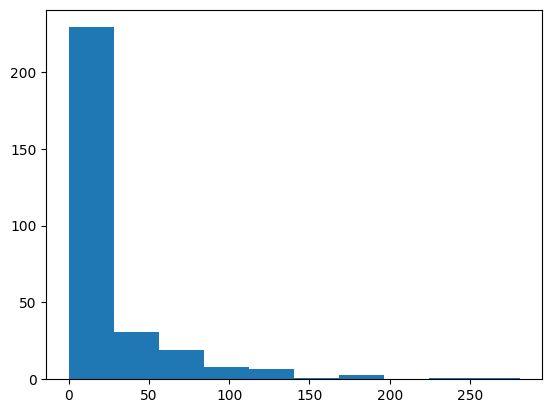

In [8]:
n_bins = 10

def plt_show_hist(data, n_bins=10):
    fig, ax = plt.subplots()
    ax.hist(data, n_bins)
    plt.show()

plt_show_hist(data, n_bins)

In [24]:
import math

v = 2 
q_max = 2 / (1 + v**2)
print(f"v={round(v, 3)} => q_max={round(q_max, 3)}")

q = 0.30
if q > q_max:
    print("q > q_max")
else:
    print(f"q={q}")
    
t = 105
print(f"t={round(t, 3)}")

t1 = (1 + math.sqrt((1 - q)/(2 * q) * (v**2 - 1))) * t
t2 = (1 - math.sqrt((q) / (2 * (1 - q)) * (v ** 2 - 1))) * t
print(f"t1={round(t1, 3)}, t2={round(t2, 3)}")


v=2 => q_max=0.4
q=0.3
t=105
t1=301.437, t2=20.813


In [10]:
import random as rd

class Generator:
    def __init__(self, q, t1, t2):
        self.q = q
        self.t1 = t1
        self.t2 = t2
        
    def __exponent(self, m, x):
        return (-1) * math.log(x) * m

    def random(self):
        rq = rd.random()
        rx = rd.random()
        if rq <= q:
            return self.__exponent(self.t1, rx)
        else:
            return self.__exponent(self.t2, rx)


In [11]:
gen = Generator(q, t1, t2)

rd.seed(22)

# Сгенерируем 1 000 значений для УИР3
n = 1000
data_gen = []

for i in range(n):
    data_gen.append(gen.random())
    
with open('numbers.txt', 'w') as file:
    for i in data_gen:
        file.write(f"{i}\n")

    